<h2>Model_Building</h2>

In [41]:
import numpy as np 
import pandas as pd 

In [42]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [43]:
# df2['CROP'].value_counts()

In [44]:
df=pd.read_csv('Datasets/updated_data.csv')

In [45]:
df.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000.0,Rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000.0,Rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000.0,Rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000.0,Rice
4,4,69,37,42,23.058049,83.370118,7.073454,251.055000,Andaman and Nicobar,3500.0,Rice


In [46]:
df1=df

In [47]:
df1=df1.sample(frac=1)
df1.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
2186,2186,66,47,36,24.854414,74.440705,6.572561,175.572958,Uttar Pradesh,1150.465116,Jute
631,631,20,41,20,29.273086,89.487502,7.073048,50.924655,Kerala,3800.000000,MungBean
2157,2157,25,132,198,22.319441,90.851744,5.732758,100.117344,Uttar Pradesh,1471.010638,Apple
1349,1349,120,23,55,27.844928,91.606666,6.732049,26.478444,Tamil Nadu,1643.000000,Muskmelon
462,462,7,74,17,22.472532,62.565325,5.667420,96.747070,Kerala,6100.000000,PigeonPeas


In [48]:
df1.drop('Unnamed: 0', axis=1,inplace=True)
# df1.info()

In [49]:
df2=df1

In [50]:
y=df2['CROP']
x=df2.drop('CROP', axis=1)

In [51]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
2186,66,47,36,24.854414,74.440705,6.572561,175.572958,Uttar Pradesh,1150.465116
631,20,41,20,29.273086,89.487502,7.073048,50.924655,Kerala,3800.000000
2157,25,132,198,22.319441,90.851744,5.732758,100.117344,Uttar Pradesh,1471.010638
1349,120,23,55,27.844928,91.606666,6.732049,26.478444,Tamil Nadu,1643.000000
462,7,74,17,22.472532,62.565325,5.667420,96.747070,Kerala,6100.000000


In [52]:

from sklearn.preprocessing import OneHotEncoder

categorical_feature = 'STATE'

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = pd.DataFrame(encoder.fit_transform(x[[categorical_feature]]))

new_column_names = encoder.get_feature_names_out([categorical_feature])

#creating new columns and appending the new encoded columns to the dataset.
for i in range(len(new_column_names)):
    x[new_column_names[i]] = encoded_data.iloc[:, i]

# Now categorical feature is one-hot encoded
print(x)


      N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
2186      66      47      36    24.854414  74.440705  6.572561  175.572958   
631       20      41      20    29.273086  89.487502  7.073048   50.924655   
2157      25     132     198    22.319441  90.851744  5.732758  100.117344   
1349     120      23      55    27.844928  91.606666  6.732049   26.478444   
462        7      74      17    22.472532  62.565325  5.667420   96.747070   
...      ...     ...     ...          ...        ...       ...         ...   
919       39      17      45    18.096911  90.421774  6.924491  104.881890   
1875      89      47      38    25.524690  72.248508  6.002525  151.886997   
61        76      47      42    20.083696  83.291147  5.739175  263.637218   
755       44      77      21    32.639187  61.300905  7.326980   61.838761   
1868     114      40      17    24.326305  80.134564  6.363406   69.450721   

              STATE   CROP_PRICE  STATE_Andaman and Nicobar  ..

In [53]:
x.drop('STATE', axis=1, inplace=True) # Duplicate category
x.drop('CROP_PRICE', axis=1, inplace=True) #outdated data in this field

In [54]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2186,66,47,36,24.854414,74.440705,6.572561,175.572958,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,20,41,20,29.273086,89.487502,7.073048,50.924655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,25,132,198,22.319441,90.851744,5.732758,100.117344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,120,23,55,27.844928,91.606666,6.732049,26.478444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462,7,74,17,22.472532,62.565325,5.667420,96.747070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


splitting data into Train, Validation and test

In [55]:
tr_no=int(0.7*len(x))

train_x=x[:tr_no]

test_x=x[tr_no:]

train_y=y[:tr_no]

test_y=y[tr_no:]


In [56]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2186,66,47,36,24.854414,74.440705,6.572561,175.572958,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,20,41,20,29.273086,89.487502,7.073048,50.924655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,25,132,198,22.319441,90.851744,5.732758,100.117344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,120,23,55,27.844928,91.606666,6.732049,26.478444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462,7,74,17,22.472532,62.565325,5.667420,96.747070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,88,5,47,25.864755,86.674680,6.662245,41.165548,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
294,27,59,22,21.811676,23.205912,5.794159,130.060809,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,66,53,19,23.093481,60.115938,6.033550,65.497307,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,134,52,18,23.964313,76.591759,7.994680,76.130906,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Navie Bayes</h3>

In [57]:
model = GaussianNB()

In [58]:
model.fit(train_x, train_y)

GaussianNB()

In [59]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 761 to 1868
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     660 non-null    int64  
 1   P_SOIL                     660 non-null    int64  
 2   K_SOIL                     660 non-null    int64  
 3   TEMPERATURE                660 non-null    float64
 4   HUMIDITY                   660 non-null    float64
 5   ph                         660 non-null    float64
 6   RAINFALL                   660 non-null    float64
 7   STATE_Andaman and Nicobar  660 non-null    float64
 8   STATE_Andhra Pradesh       660 non-null    float64
 9   STATE_Assam                660 non-null    float64
 10  STATE_Chattisgarh          660 non-null    float64
 11  STATE_Goa                  660 non-null    float64
 12  STATE_Gujarat              660 non-null    float64
 13  STATE_Haryana              660 non-null    floa

In [60]:
testing_y=model.predict(test_x)

In [61]:
accuracy = accuracy_score(test_y, testing_y)
precision = precision_score(test_y, testing_y, average='weighted')
recall = recall_score(test_y, testing_y, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8227
Precision: 0.8448
Recall: 0.8227


<h3>Random Forests</h3>

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
train_x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2186,66,47,36,24.854414,74.440705,6.572561,175.572958,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,20,41,20,29.273086,89.487502,7.073048,50.924655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,25,132,198,22.319441,90.851744,5.732758,100.117344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,120,23,55,27.844928,91.606666,6.732049,26.478444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462,7,74,17,22.472532,62.565325,5.667420,96.747070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
model1=RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(train_x, train_y)
testing_y1=model1.predict(test_x)

In [65]:
accuracy = accuracy_score(test_y, testing_y1)
precision = precision_score(test_y, testing_y1, average='weighted')
recall = recall_score(test_y, testing_y1, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9939
Precision: 0.9940
Recall: 0.9939


<h4>Dumping this model as a pickle file in the folder</h4>

In [66]:
# pip install pickle



In [67]:
import pickle as pickle

In [68]:
pickle.dump(model1, open('RNDFRST.pkl', 'wb'))

<h4>Evaluating why Random forest did significantly better than Naive bayes (99.3% >> 84%) Accuracy</h4> 
-There are a few assumptions that naive bayes makes when making predictions<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->Gausian distribution (Since we are using the gaussian classifier)<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->The parameters/Features in the dataset are independent from one another 

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 2186 to 1868
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   float64
 9   CROP         2200 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 189.1+ KB


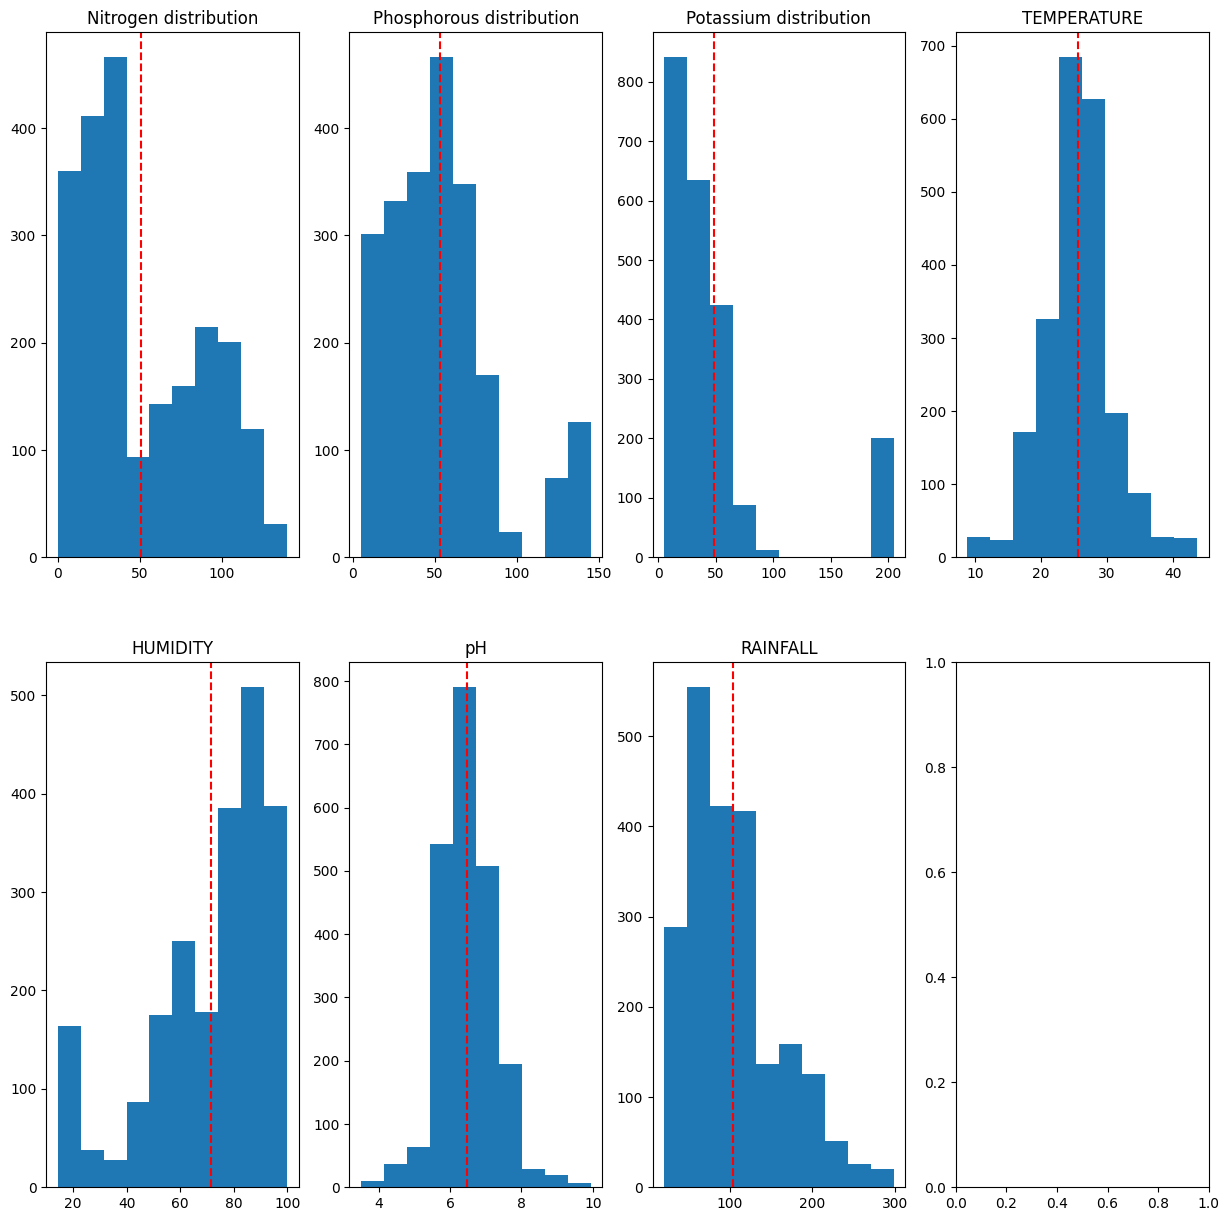

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes= plt.subplots(2,4, figsize=(15,15))
axes[0][0].hist(df2['N_SOIL'])
axes[0][0].axvline(x=df2['N_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][0].set_title('Nitrogen distribution')

axes[0][1].hist(df2['P_SOIL'])
axes[0][1].axvline(x=df2['P_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][1].set_title('Phosphorous distribution')

axes[0][2].hist(df2['K_SOIL'])
axes[0][2].axvline(x=df2['K_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][2].set_title('Potassium distribution')

axes[0][3].hist(df2['TEMPERATURE'])
axes[0][3].axvline(x=df2['TEMPERATURE'].mean(), color='Red', linestyle='dashed')
axes[0][3].set_title('TEMPERATURE')

axes[1][0].hist(df2['HUMIDITY'])
axes[1][0].axvline(x=df2['HUMIDITY'].mean(), color='Red', linestyle='dashed')
axes[1][0].set_title('HUMIDITY')

axes[1][1].hist(df2['ph'])
axes[1][1].axvline(x=df2['ph'].mean(), color='Red', linestyle='dashed')
axes[1][1].set_title('pH')

axes[1][2].hist(df2['RAINFALL'])
axes[1][2].axvline(x=df2['RAINFALL'].mean(), color='Red', linestyle='dashed')
axes[1][2].set_title('RAINFALL')


plt.show()


<h5>Here we can see only two features follow the normal distribution</h5>
&nbsp;&nbsp;&nbsp;&nbsp;->Temperature<br>
&nbsp;&nbsp;&nbsp;&nbsp;->pH <br><br>
which may be the reason for the poorer perfomance of the naive bayes algorithm comparetively

<h3>Employing SVM classifier </h3>  #COME BACK TO THIS LATER


Retrieving the vector/matrix with high probabilities.

In [71]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 2186 to 1812
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     1540 non-null   int64  
 1   P_SOIL                     1540 non-null   int64  
 2   K_SOIL                     1540 non-null   int64  
 3   TEMPERATURE                1540 non-null   float64
 4   HUMIDITY                   1540 non-null   float64
 5   ph                         1540 non-null   float64
 6   RAINFALL                   1540 non-null   float64
 7   STATE_Andaman and Nicobar  1540 non-null   float64
 8   STATE_Andhra Pradesh       1540 non-null   float64
 9   STATE_Assam                1540 non-null   float64
 10  STATE_Chattisgarh          1540 non-null   float64
 11  STATE_Goa                  1540 non-null   float64
 12  STATE_Gujarat              1540 non-null   float64
 13  STATE_Haryana              1540 non-null   fl

In [72]:
# df=pd.DataFrame({
#     ''
# })

In [73]:

predicted_proba = model1.predict_proba(train_x[:1])

# for i in range(4):
#     for j in range(22):
#         if(predicted_proba[i][j]>=0.2 and predicted_proba[i][j]<0.95):
#             print(f"{i}: {predicted_proba[i]}")
#             print("\n")
#             break

predicted_proba


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.98, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [74]:
labels=model1.classes_
labels

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)

In [75]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2186,66,47,36,24.854414,74.440705,6.572561,175.572958,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,20,41,20,29.273086,89.487502,7.073048,50.924655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2157,25,132,198,22.319441,90.851744,5.732758,100.117344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,120,23,55,27.844928,91.606666,6.732049,26.478444,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
462,7,74,17,22.472532,62.565325,5.667420,96.747070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,88,5,47,25.864755,86.674680,6.662245,41.165548,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
294,27,59,22,21.811676,23.205912,5.794159,130.060809,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,66,53,19,23.093481,60.115938,6.033550,65.497307,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1844,134,52,18,23.964313,76.591759,7.994680,76.130906,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>Encoding the user inputs</h2>

In [227]:

n=50
p=75
k=50
t=45
h=100
ph=10
r=170
s="Andhra Pradesh"
columns=train_x.columns.to_list()
columns=columns[7:]
dataf={'N_SOIL':n,
    'P_SOIL':p,
    'K_SOIL':k,
    'TEMPERATURE':t,
    'HUMIDITY':h,
    'ph':ph,
    'RAINFALL': r}
dataf=pd.DataFrame(dataf, index=['new_data'])

for c in columns:
    if(c==f"STATE_{s}"):
        dataf[c]=1.0
    else:
        dataf[c]=0.0

dataf
    



,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
new_data,50,75,50,45,100,10,170,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
resp=model1.predict(dataf)


<h1>Implementing Explainability</h1>
<h3>->PDP (partial dependence plots)</h3>
<h3>->SHAP (Shapley additive explainations)<h3>

In [94]:
pip install shap

   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/453.1 kB 1.7 MB/s eta 0:00:01
   ------------------ --------------------- 204.8/453.1 kB 3.1 MB/s eta 0:00:01
   --------------------- ------------------ 245.8/453.1 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/453.1 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.7 MB 6.7 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 6.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 3.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 3.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.7 MB 2.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 2.8 MB/s eta 0:00:01
   --

<h4> Below code provides all possible crops for soil</h4> 

In [229]:
prob=model1.predict_proba(dataf)
probab=prob[0]
indices=probab.argsort()[::-1][:2] #to find the index of 2 largest probabilites in prediction

crop1= model1.classes_[indices[0]]

if (probab[indices[0]]-probab[indices[1]])<0.2:
    crop2=model1.classes_[indices[1]]
    print(f"The crops that are most suitable for your soil are {crop1} and {crop2}")



Displaying the explainability

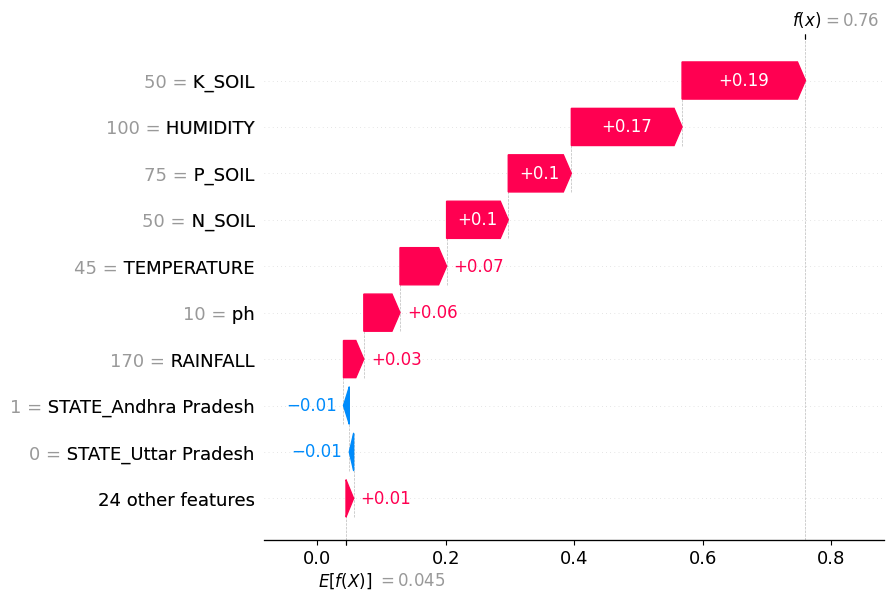

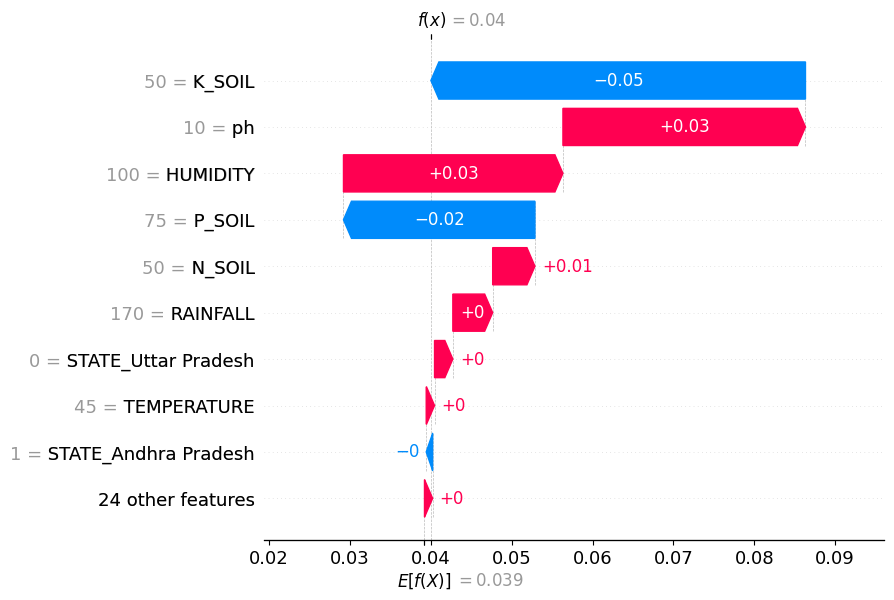

In [230]:
import matplotlib.pyplot as plt

import shap
shap.initjs()


explainer=shap.Explainer(model1)

shap_values=explainer(dataf)

shap.plots.waterfall(shap_values[0,:,indices[0]])

shap.plots.waterfall(shap_values[0,:,indices[1]])





In [224]:
shap_values[0,:,indices[0]]


.values =
array([-3.18026815e-02, -4.84206478e-03,  1.50691640e-02,  6.43887541e-02,
        9.62562654e-02,  3.38211230e-02,  2.97224012e-02, -1.46772750e-04,
       -1.09097369e-02,  4.82086005e-04,  3.82781394e-06,  3.83630339e-07,
        1.18361244e-03,  4.98547400e-04,  2.19416913e-04,  1.94873564e-05,
        1.90016270e-04,  1.20708642e-03,  4.62761184e-04,  2.33145318e-04,
       -1.33912045e-04,  1.96058506e-05,  1.02658476e-04,  7.02092680e-04,
        9.93333995e-05,  6.77468721e-05,  2.37663917e-04,  3.55970355e-05,
       -7.28569644e-05,  2.29947628e-04, -2.39171738e-03, -1.46357868e-04,
        2.71297782e-04])

.base_values =
0.04492207792207791

.data =
array([140., 140., 200.,  45., 100.,  10., 170.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

<H3>Partial dependency plot</h3>

In [202]:
from sklearn.inspection import plot_partial_dependence


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


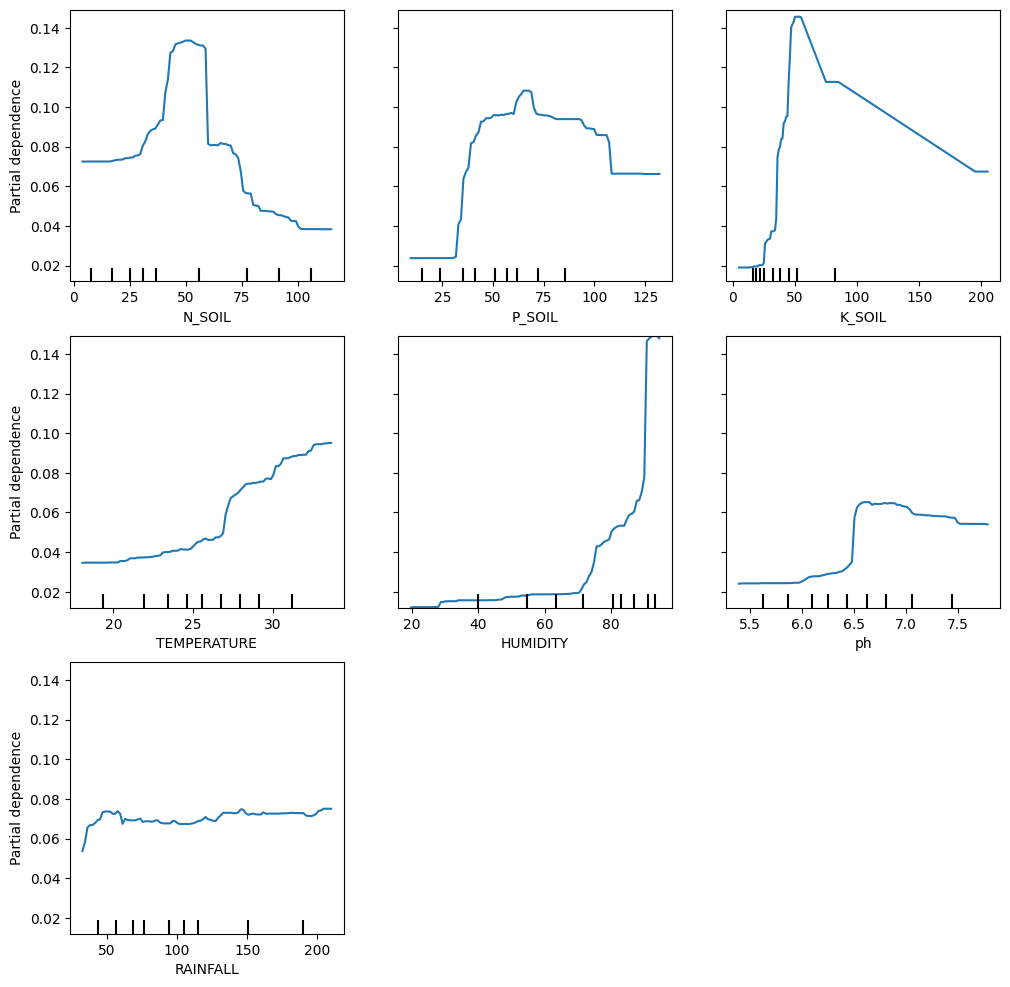

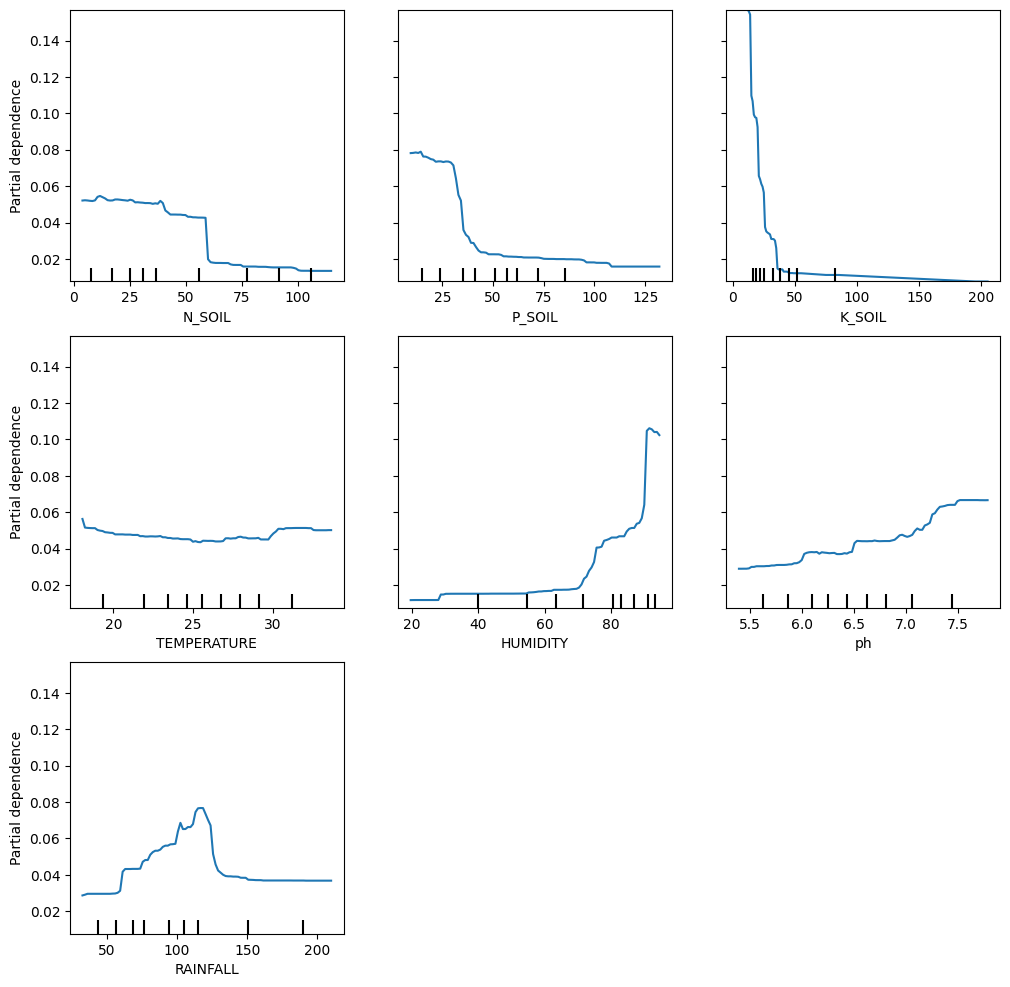

In [231]:
fig, ax = plt.subplots(figsize=(12, 12))
plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[0]], ax=ax)
fig, ax = plt.subplots(figsize=(12, 12))
plot_partial_dependence(model1 ,train_x ,dataf.columns.to_list()[:7],target=model1.classes_[indices[1]], ax=ax)
plt.show()

<h4>The above plot shows how changes in soil affects the growth of the recommended crop</h4>

In [233]:
model1.classes_[indices[0]] 


'Orange'